In [1]:
import  os  
import  sys  
import  tty, termios  
import roslib; roslib.load_manifest('autocar')  
import rospy 
import pygame 
from pygame.locals import * 
from std_msgs.msg import String  
from autocar.msg import *
from geometry_msgs.msg import Twist
from nav_msgs.msg import *
from math import *
# import tf
import numpy as np
import json

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [183]:
vMAX, vMIN = 5, -5
aMAX, aMIN = 10,-10
dt = 0.1
SIM_T = 50
SIM_ITRS = int(SIM_T/dt)

xGOAL = 190

VFRONT = 1.98
VREAR = 0.405
VLEN  = VFRONT+VREAR
VHW = 0.6



In [83]:
num_lanes = 2
num_cars_per_lane = [4,4]
numCars = sum(num_cars_per_lane)
yFIRST_LANE = 18.5
LANE_WIDTH = 3.0

In [116]:
## State = (t, x, y, vx, vy)
tIdx, xIdx, yIdx, vxIdx, vyIdx = [i for i in range(5)]

# first car is autoCar, remaining agentCars
INITPOS_CARS =np.array([
    [0, 10, 21.5, 2, 0],
    [0, 25, 18.5, 2, 0],
    [0, 45, 18.5, 2, 0],
    [0, 65, 18.5, 2, 0],
    [0, 85, 18.5, 2, 0],
    [0, 20, 21.5, 3, 0],
    [0, 35, 21.5, 3, 0],
    [0, 50, 21.5, 3, 0],
    [0, 65, 21.5, 3, 0]
])

INITPOS = INITPOS_CARS[0]

In [ ]:
def nextState(a,s):
    t,y,v = s[iT],s[iY],s[iV]
    v = round(v + a*dt, 8)
    if v > vMax:
        v = vMax
    elif v < vMin:
        v = vMin
    
    y = round(y + v*dt, 8)

    if y < Y_ST-(L- DIST_FR_FRONT) : # relative to centre of autoCar (not its origin)
        y = 0
    
    t += dt
    return (round(t,1),y,v)

def move(a,s):
    _,y0, _  = s
    stateTmp = nextState(a,s)
    t1,_, _  = stateTmp
    
    if isObsFree(stateTmp):
        return stateTmp
    else:
        return (t1,y0,0) # assume vel = 0 when collided and pos remains as previous state

In [ ]:
def gen1stCar(state, duration, v1):
    assert(v1<=vMAX)
    states = []
    
    t, x, y, vx, vy = state
    a = round((v1 - vx)/duration,8)
    assert(aMIN <= a <= aMAX)
    
    for _ in range(int(duration/dt)):
        t=round(t+dt,8)
        vx= round(vx+a*dt,8)
        x = round(x+vx*dt,8)
        states.append((t,x,y,vx,vy))
    
    return states    

In [225]:
def getLanes(ys):
    laneDIC=dict()
    i=0
    laneMAP = dict(zip(yLanes,range(num_lanes))) # Mapping from y-value to laneID
#     ys = INITPOS_CARS[:,yIdx]
    for car in CARS:
        laneDIC[car] = laneMAP[ys[car]]
    return laneDIC

In [184]:
## SCENARIO <<<< CHANGE HERE!

PATHS = []

## Lane 0 - const vel
state = INITPOS_CARS[firstCARS[0],:]
path = [state]
path += gen1stCar(path[-1],SIM_T,path[-1][vxIdx])
PATHS.append(path)

## Lane 1 - const vel
state = INITPOS_CARS[firstCARS[1],:]
path = [state]
path += gen1stCar(path[-1],SIM_T,path[-1][vxIdx])
PATHS.append(path)


In [56]:
def moveFirstCar(itr, car):
    laneId = laneDIC[car]
    return PATHS[laneId][itr]


In [ ]:
## Idea Sketch
CARS = [i for i in range(numCars+1)]

states = INITPOS_CARS
simulation = [states]

for itr in range(SIM_ITRS):
    
    laneDIC = getLanes(ys) # get lane for each car
    
    for car in CARS:
        if car==autoCAR:
            nextState.append(moveAutoCar(states, car))
        elif car in firstCARS:
            nextState.append(moveFirstCar(itr, car))
        else:
            nextState.append(moveAgentCar(states, car))
    states = nextState
    simulation.append(states)

In [201]:
autoCAR = 0

firstCARS =[]
MASK_AGENTS = np.array([False]+[True for _ in range(numCars)])
yLanes = [i*LANE_WIDTH+yFIRST_LANE for i in range(num_lanes)]
for yLane in yLanes:
    mask= (INITPOS_CARS[:,yIdx]==yLane)*MASK_AGENTS
    firstCARS.append(np.argmax(xs*mask))
    

In [198]:
car = 1
state = INITPOS_CARS[car,:]

In [199]:
yLanes

[18.5, 21.5]

In [200]:
yLanes==21.5

False

In [203]:
laneDIC

{4: 0, 8: 1}

In [ ]:
def moveAgentCar(states, car):
    #ts = states[:,tIdx]
    xs = states[:,xIdx]
    ys = states[:,yIdx]
    vxs= states[:,vxIdx]
    vys= states[:,vyIdx]
    
    t, x, y, vx, vy = states[car,:]
    lane = laneDIC[car]
    ## Define FF, FS, BF, OT conditions 

In [ ]:
moveFirstCar(500, firstCARS[1])

In [155]:
laneDIC[8]

1

In [142]:
firstCARS

[4, 8]

In [163]:
tmp = (iter(range(3)))

In [169]:
next(tmp,np.nan)

nan

In [ ]:
## carInFront
xs = np.empty((numCars,))
ys = np.empty((numCars,))
laneIds = np.empty((numCars,))

xs[]

## carBehind


## nearbyCars

In [63]:
## Scenario: constant vel
state = tuple([0, 85, 18.5, 2, 0])
path = [state]
path += gen1stCar(path[-1],50,path[-1][vxIdx])
path

[(0, 85, 18.5, 2, 0),
 (0.1, 85.2, 18.5, 2.0, 0),
 (0.2, 85.4, 18.5, 2.0, 0),
 (0.3, 85.6, 18.5, 2.0, 0),
 (0.4, 85.8, 18.5, 2.0, 0),
 (0.5, 86.0, 18.5, 2.0, 0),
 (0.6, 86.2, 18.5, 2.0, 0),
 (0.7, 86.4, 18.5, 2.0, 0),
 (0.8, 86.6, 18.5, 2.0, 0),
 (0.9, 86.8, 18.5, 2.0, 0),
 (1.0, 87.0, 18.5, 2.0, 0),
 (1.1, 87.2, 18.5, 2.0, 0),
 (1.2, 87.4, 18.5, 2.0, 0),
 (1.3, 87.6, 18.5, 2.0, 0),
 (1.4, 87.8, 18.5, 2.0, 0),
 (1.5, 88.0, 18.5, 2.0, 0),
 (1.6, 88.2, 18.5, 2.0, 0),
 (1.7, 88.4, 18.5, 2.0, 0),
 (1.8, 88.6, 18.5, 2.0, 0),
 (1.9, 88.8, 18.5, 2.0, 0),
 (2.0, 89.0, 18.5, 2.0, 0),
 (2.1, 89.2, 18.5, 2.0, 0),
 (2.2, 89.4, 18.5, 2.0, 0),
 (2.3, 89.6, 18.5, 2.0, 0),
 (2.4, 89.8, 18.5, 2.0, 0),
 (2.5, 90.0, 18.5, 2.0, 0),
 (2.6, 90.2, 18.5, 2.0, 0),
 (2.7, 90.4, 18.5, 2.0, 0),
 (2.8, 90.6, 18.5, 2.0, 0),
 (2.9, 90.8, 18.5, 2.0, 0),
 (3.0, 91.0, 18.5, 2.0, 0),
 (3.1, 91.2, 18.5, 2.0, 0),
 (3.2, 91.4, 18.5, 2.0, 0),
 (3.3, 91.6, 18.5, 2.0, 0),
 (3.4, 91.8, 18.5, 2.0, 0),
 (3.5, 92.0, 18.5, 2.0, 0)

In [ ]:
## Scenario: traffic jam (stuck)
state = tuple([0, 85, 18.5, 2, 0])
path = [state]
period = 0.5
for i in range(5):    
    path += gen1stCar(path[-1], 1,0)
    path += gen1stCar(path[-1], 0.5,1)
for i in range(15):    
    path += gen1stCar(path[-1], 0.5,0)
    path += gen1stCar(path[-1], 2,2)
path

In [ ]:
## Scenario: traffic jam (clears after some time)
state = tuple([0, 85, 18.5, 2, 0])
path = [state]
period = 0.5
for i in range(8):    
    path += gen1stCar(path[-1], 1,0)
    path += gen1stCar(path[-1], 0.5,1)

path += gen1stCar(path[-1], 38,2)
path

In [ ]:
## Scenario: traffic jam
state = tuple([0, 85, 18.5, 2, 0])
path = [state]
path += gen1stCar(path[-1],1,1)
path += gen1stCar(path[-1],2,0)
path += gen1stCar(path[-1],2,vMAX)
path += gen1stCar(path[-1],2,vMAX)
path

In [1]:
class SpeedController:
    def __init__(self):
        self.init()
        self.start_game = False

    def init(self):
        self.path2config = rospy.get_param('~path2config', None)
        self.hz = rospy.get_param('~hz', 10)
        # self.path2config = 'Q1_world_1.json'
        if self.path2config == None:
            print 'path to config file is missing!'
            sys.exit(-1)

        self.rate = rospy.Rate(self.hz) 

        self.loadConfig()
        self.initPubs()

    def gameStarts(self, msg):
        if msg.state == 1 or msg.state == 2:
            self.start_game = True

    def initPubs(self):
        self.robot_pubs = {}
        count = 1
        for i in range(self.num_lanes):
            num_car_lane = self.num_cars_per_lane[i]
            for j in range(num_car_lane):
                self.robot_pubs[count] = {}
                self.robot_pubs[count]['laneid'] = i
                self.robot_pubs[count]['pub'] = rospy.Publisher('robot_' + str(count) + '/cmd_vel', Twist, queue_size=1)
                count += 1

    def loadConfig(self):
        with open(self.path2config, 'r') as f:
            self.d = json.load(f)

        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< MANUAL INPUT<<<<<<<<<<<<,
        self.num_lanes = 2 
        self.num_cars_per_lane = [4, 4]
        # self.mean_speed_per_lane = self.d['mean_speed_per_lane']
        # self.stdrr_speed_per_lane = self.d['stdrr_speed_per_lane']
        assert(len(d.keys()) == sum(self.num_cars_per_lane))
        
        for i in self.d.keys():

    def update_vel(self, i):
        mean_vel = self.mean_speed_per_lane[i]
        stdrr_vel = self.stdrr_speed_per_lane[i]
        return np.random.normal(mean_vel, stdrr_vel)

    def run(self):
        while not rospy.is_shutdown():
            # publish the speed for each robot
            if self.start_game:
                for i in self.robot_pubs:
                    vel = self.update_vel(self.robot_pubs[i]['laneid'])
                    yaw = 0
                    self.send_control(self.robot_pubs[i]['pub'], vel, yaw)
            self.rate.sleep()
            
    def send_control(self, robot_pub, vel, yaw):
        msg = Twist()
        msg.linear.x = vel
        msg.angular.z = 0
        robot_pub.publish(msg)

if __name__=='__main__':
    rospy.init_node('agent_controller')

    controller = SpeedController()
    rospy.Subscriber('/robot_0/highway_game_start', RecordState, controller.gameStarts, queue_size=1)

    controller.run()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('path to config file is missing!')? (<ipython-input-1-a1a7deb423eb>, line 27)

In [1]:
%matplotlib inline

In [6]:
import numpy as np
import json
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from heapq import *
from math import *
# import rospy

In [10]:
velY = self.vel * cos(radians(theta))
velX = self.vel * sin(radians(theta))

3.141592653589793

In [33]:
# state indices (t,y,v)
iT, iY, iV  = 0,1,2

vMax, vMin = 5.0, -5.0
aMax, aMin = 10.0, -10.0
ACTIONS = np.linspace(aMin,aMax, num=3)[::-1]
dt = 0.1

time = np.arange(0,60,0.1)

TIMEOUT = 60

L, W = 2.385, 1.2
DIST_FR_FRONT = 1.98

tBuff, yBuff = 0.2, 0.1
print("obstacle buffer (tBuff,yBuff)={}".format((tBuff,yBuff)))

obstacle buffer (tBuff,yBuff)=(0.2, 0.1)


In [4]:
IS_POSE,TASK1, TASK2 = 'pose', 'Task 1', 'Task 2'

def getData(file,poseOrAction):
    if poseOrAction == IS_POSE:
        inDir = "./future_positions"
        filePath = "{:s}/{}_poses.json".format(inDir,file)
    elif poseOrAction == IS_TASK1:
        inDir = "./output_controls/1"
        filePath = "{:s}/{}_controls.json".format(inDir,file)
    elif poseOrAction == IS_TASK2:
        inDir = "./output_controls/2"
        filePath = "{:s}/{}_controls.json".format(inDir,file)

    with open(filePath, 'r') as inFile:
        data = json.load(inFile)

    for obs in data.keys():
        data[obs]=np.array(data[obs])
    
    return data

def writeOut(file, task, data):
    qnNum = 1 if task == TASK1 else 2
        
    inDir = "./output_controls/{:d}".format(qnNum)
    filePath = "{:s}/{}_controls.json".format(inDir,file)
    
    with open(filePath, 'w') as outfile:
        json.dump(data, outfile)

In [6]:
X_ST, Y_ST, ORI_ST = 100, 5, 90

yGoal = 27.0
t0 = 0
y0 = Y_ST
v0 = 0
START = (t0,y0,v0)

print("(t0,y0,v0)={}".format(START))

(t0,y0,v0)=(0, 5, 0)


In [7]:
def tToi(t):
    return int(round(t/dt))

In [8]:
def getObstacles(data):
    obstacles = {} # space-time obstacles

    for obs in data.keys():
        ori = data[obs][0,2]
        yTop = round(data[obs][0,1] + L + yBuff, 8)
        yBot = round(data[obs][0,1] - L - yBuff, 8)
        if ori == 0:
            condition = np.logical_and(data[obs][:,0]>=(X_ST -(DIST_FR_FRONT+W)), data[obs][:,0]<=(X_ST +(L-DIST_FR_FRONT+W)) )
        elif ori == 180:
            condition = np.logical_and(data[obs][:,0]<=(X_ST +(DIST_FR_FRONT+W)), data[obs][:,0]>=(X_ST -(L-DIST_FR_FRONT+W)) )

#         print("{:s} (yTop,yBot)=({:5.2f},{:5.2f})".format(obs,yTop,yBot))
#         print(data[obs][:,3][condition]) # 1st and last time t
#         print([min(data[obs][:,3][condition])-i for i in range(int(tBuff/dt)) ])
#         print(max(data[obs][:,3][condition]))
#         break
        
        time = data[obs][:,3][condition]
        if len(time)==0:
            continue
        time = np.round(np.arange(min(time)-tBuff,max(time)+tBuff +dt,dt), 8)
        
        for t in time:
            if t not in obstacles.keys():
                obstacles[t] = set( [(yBot,yTop)] )
            else:
                obstacles[t] = obstacles[t].union(set( [(yBot,yTop)] ))
            
    
    return obstacles

In [173]:
def estimObstacles(currObserv):
    obstacles = {}
    
    t = currObserv[0,-1,-1]
    t0 = t
    numObs = currObserv.shape[0]

#     TIME = np.arange(t,TIMEOUT-dt,dt)
    TIME = np.arange(0,TIMEOUT,dt)

    x2 = currObserv[:,-1,0]
    x1 = currObserv[:,-2,0]
    v = (x2-x1)/dt

    yTop = np.round(currObserv[:,-1,1] + L + yBuff, 8)
    yBot = np.round(currObserv[:,-1,1] - L - yBuff, 8)

    ori = currObserv[:,-1,2]

    # Estimate x position
    xEst = np.empty((numObs,tToi(TIMEOUT)),dtype='float')

    # di.shape = (1,num_i)
    di = np.array([i-tToi(t) for i in range(tToi(TIMEOUT))]).reshape((1,-1))

    # dx.shape = (numObs,num_i)
    dx = (v*dt).reshape((numObs,1)) @ di

    # xEst.shape = (numObs,num_i)
    xEst = x2.reshape((numObs,1)) + dx

    
    for i in range(numObs):
        if ori[i] == 0:
            condition = np.logical_and(xEst[i] >=(X_ST -(DIST_FR_FRONT+W)), xEst[i] <=(X_ST +(L-DIST_FR_FRONT+W)) )
        elif ori[i] == 180:
            condition = np.logical_and(xEst[i] <=(X_ST +(DIST_FR_FRONT+W)), xEst[i] >=(X_ST -(L-DIST_FR_FRONT+W)) )

        time = TIME[condition]
        if len(time)==0:
            continue
        time = np.round(np.arange(min(time)-tBuff,max(time)+tBuff +dt,dt), 8)

        
        for t in time:
            if t not in obstacles.keys():
                obstacles[t] = set( [(yBot[i],yTop[i])] )
            else:
                obstacles[t] = obstacles[t].union(set( [(yBot[i],yTop[i])] ))

#     print("Estimated Obstacles t={}".format(t0))
    return [obstacles,v]

In [179]:
def plotSpaceT(path,file, task,data):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xlim(0,30)
    ax.set_ylim(5,29)
    ax.set_xlabel('t')
    ax.set_ylabel('y')
    
    totalTime = path[:,iT][-1]
    ax.set_title('{} - {} (total time {:.1f}s)'.format(file, task, totalTime))
    
    obstacles = getObstacles(data)
    for t,obs in obstacles.items():
        for ymin,ymax in obs:
            ax.vlines(t, ymin, ymax, color='b')
    #         print(ymin,ymax)
    
    t, y = path[:,iT], path[:,iY]
    plt.plot(t,y,'-o',ms=0.5,c='r')
    
    inDir = "./output_controls"
    qnNum = 1 if task == TASK1 else 2
    filePath = "{:s}/{}/{}.png".format(inDir,qnNum,file)
    plt.savefig(filePath, bbox_inches='tight')
    
    plt.show()
    
    

In [180]:
def isObsFree(state):
#     print(state)
    t,y = state[iT], state[iY]
    obs = obstacles.get(t,-1)
    if obs == -1:
        return True
    else:
        for ob in obs:
            if ob[0] <= y <= ob[1]:
                return False
        return True
    
def nextState(a,s):
    t,y,v = s[iT],s[iY],s[iV]
    v = round(v + a*dt, 8)
    if v > vMax:
        v = vMax
    elif v < vMin:
        v = vMin
    
    y = round(y + v*dt, 8)

    if y < Y_ST-(L- DIST_FR_FRONT) : # relative to centre of autoCar (not its origin)
        y = 0
    
    t += dt
    return (round(t,1),y,v)

def move(a,s):
    _,y0, _  = s
    stateTmp = nextState(a,s)
    t1,_, _  = stateTmp
    
    if isObsFree(stateTmp):
        return stateTmp
    else:
        return (t1,y0,0) # assume vel = 0 when collided and pos remains as previous state

In [ ]:
# current = START
# a=0
# # for a in ACTIONS:
# while (current[iY]<yGoal):
#     neighbor = nextState(a, current)
#     current = neighbor
#     print(neighbor)
    
#     if current[iT]>=600: break

In [181]:
# Modified A* Pathfinding code from Christian Careaga (christian.careaga7@gmail.com)

def heuristic(a,b):
    spaceT1 = np.array([a[iT],a[iY]])
    spaceT2 = np.array([b[iT],b[iY]])
    return np.linalg.norm(spaceT2-spaceT1)


def aStar(start, y_goal):
#     import pdb;pdb.set_trace() #########
    
    numIters = 0
    
    tentative_goal = (round(START[iT]+(y_goal-START[iY])/vMax,1), y_goal, vMax)
    
    
    close_set = set()
    came_from = {}
    actionsTaken = {}
    gscore = {start:0}
    fscore = {start:heuristic(start,tentative_goal)}
    oheap = []

    heappush(oheap, (fscore[start], start))
    
    while oheap:
        
        numIters+=1
        if numIters % 5000 == 0:
            print("current iteration: {}".format(numIters))
        
        current = heappop(oheap)[1]
        
#         print(current)
        if current[iT]>TIMEOUT:
            return False

        if current[iY] >= y_goal:
            path = []
            actions_path = []
            while current in came_from:
                path.append(current)
                future = current
                current = came_from[current]
                actions_path.append(actionsTaken[(current,future)])
            return [path, actions_path, actionsTaken]

        close_set.add(current)
        
        
        for a in ACTIONS:
            neighbor = nextState(a, current)

            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if not isObsFree(neighbor):
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
               
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                actionsTaken[(current,neighbor)] = a
                gscore[neighbor] = tentative_g_score
                tentative_goal = (neighbor[iT]+round((y_goal-neighbor[iY])/vMax,1), y_goal, vMax)
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, tentative_goal)
                heappush(oheap, (fscore[neighbor], neighbor))
       
    return False

In [ ]:
# file = 'data4'
# task = TASK1
# data = getData(file,IS_POSE)
# obstacles = getObstacles(data)
# out = aStar(START,yGoal)

# path = np.array( [[pth[iT],pth[iY]] for pth in out[0][::-1]] )
# plotSpaceT(path,file,task, data)

# t = [i[0] for i in out[0][::-1]]
# ctrls = out[1][::-1]
# controls = {'robot_0': [[i,j] for i,j in zip(ctrls,t)]}
# writeOut(file,task,controls)

current iteration: 5000


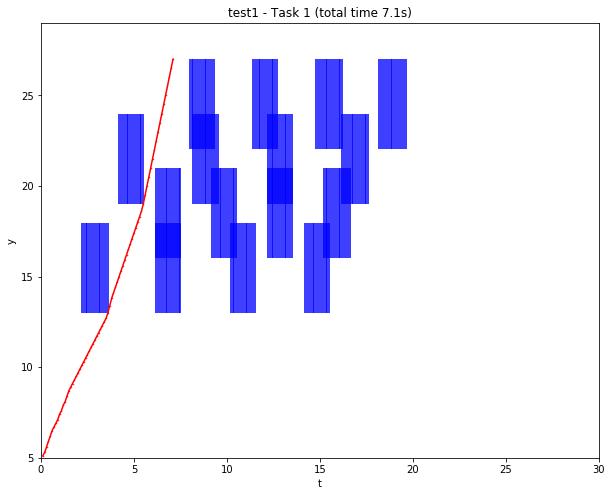

current iteration: 5000
current iteration: 10000


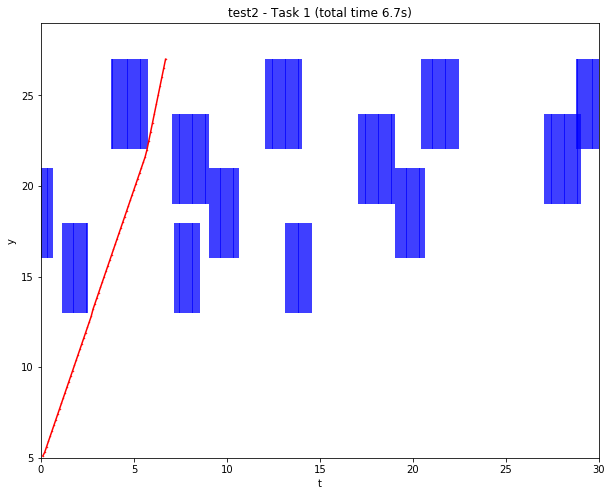

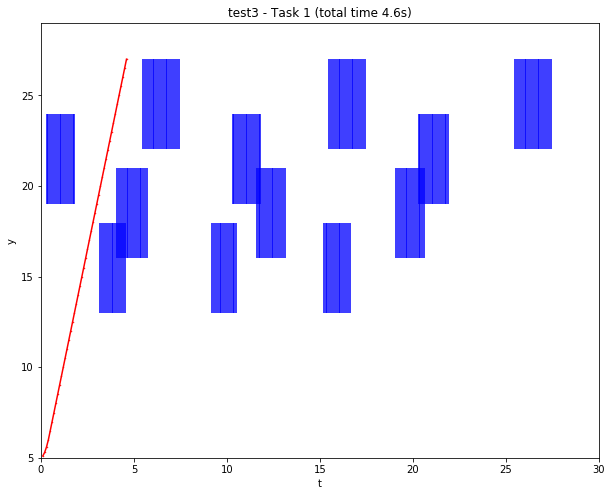

current iteration: 5000


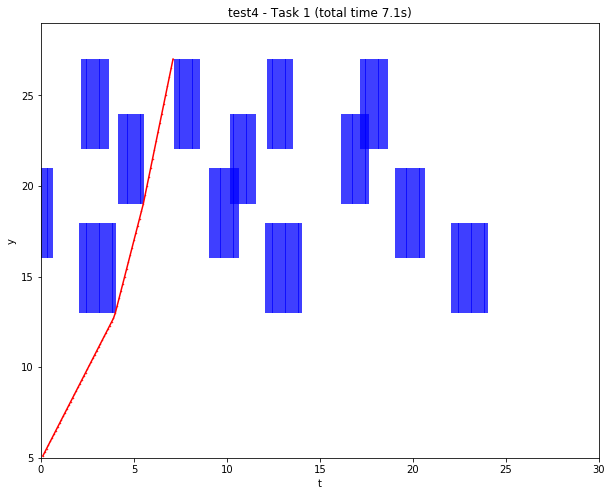

current iteration: 5000
current iteration: 10000


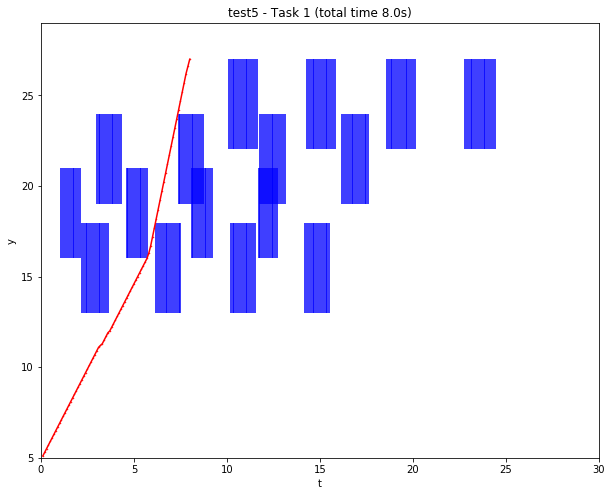

current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000


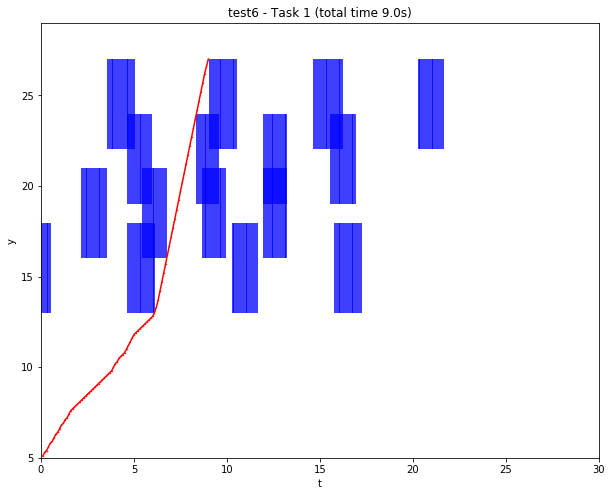

current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000


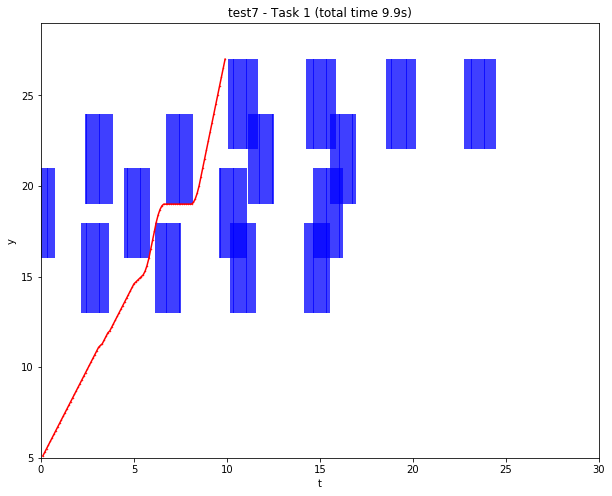

current iteration: 5000
current iteration: 10000


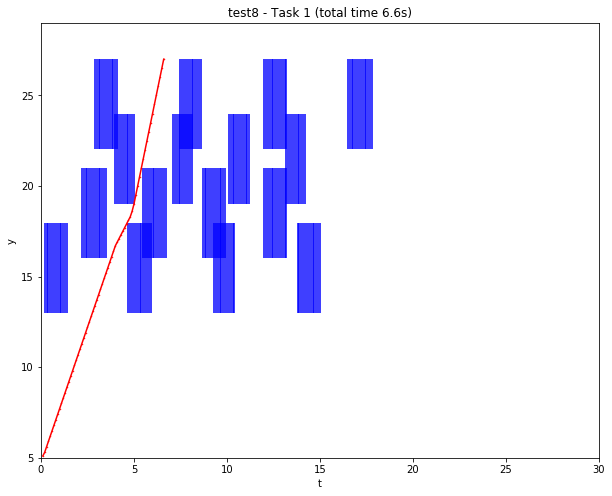

current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000


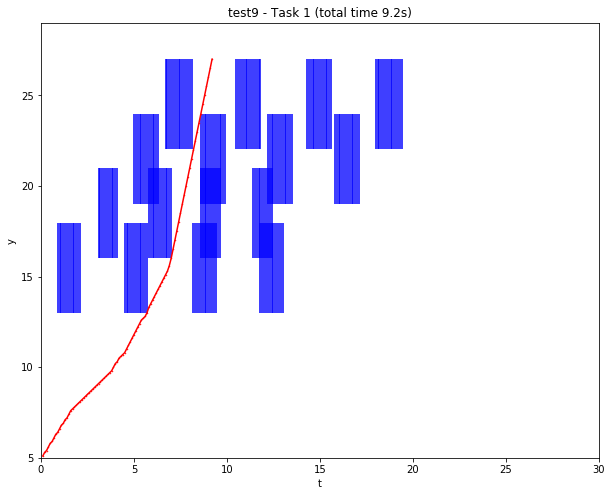

current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000
current iteration: 40000
current iteration: 45000
current iteration: 50000
current iteration: 55000
current iteration: 60000
current iteration: 65000
current iteration: 70000
current iteration: 75000


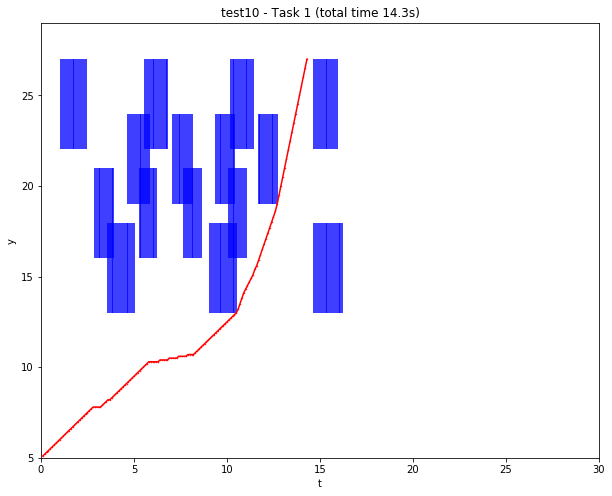

In [197]:
## TASK1

tBuff, yBuff = 0.2, 0.1

task = TASK1
# FILES = ["data{}".format(i) for i in range(1,4+1)]
FILES = ["test{}".format(i) for i in range(1,10+1)]

for file in FILES:
    data = getData(file,IS_POSE)
    obstacles = getObstacles(data)
    out = aStar(START,yGoal)

    path = np.array( [[pth[iT],pth[iY]] for pth in out[0][::-1]] )
    plotSpaceT(path,file,task, data)

    t = [i[0] for i in out[0][::-1]]
    ctrls = out[1][::-1]
    controls = {'robot_0': [[i,j] for i,j in zip(ctrls,t)]}
    writeOut(file,task,controls)

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000


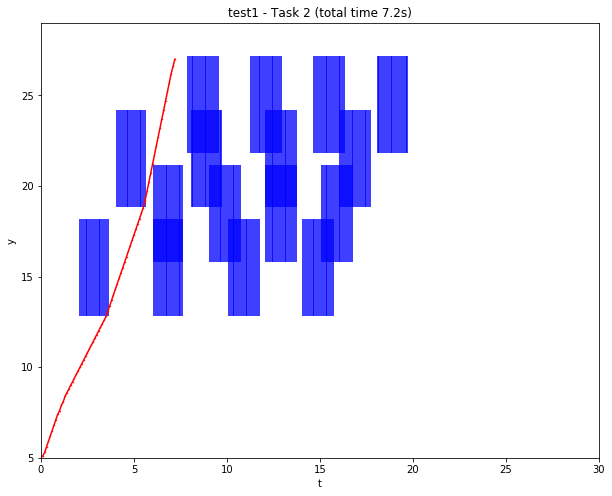

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000


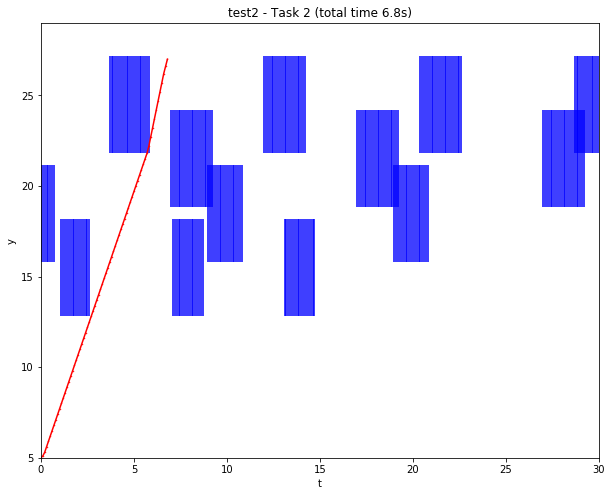

planning (t,y,v) = (0.1, 5, 0))...


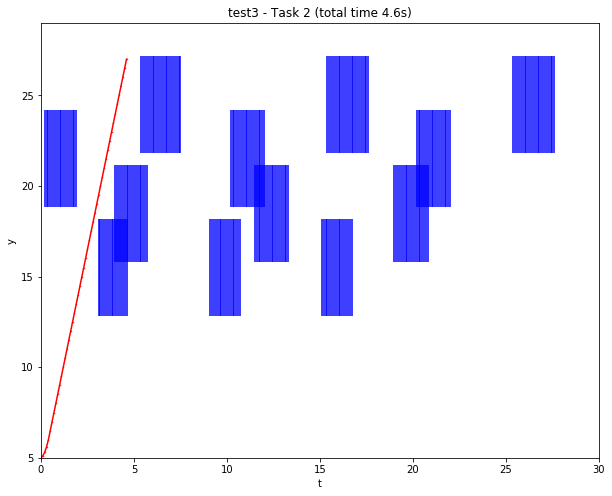

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000


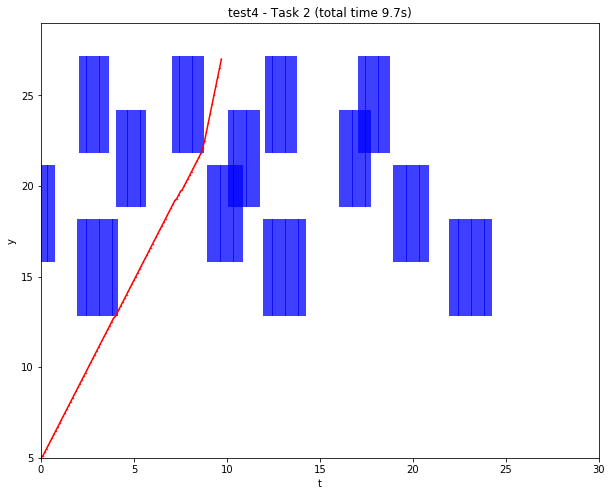

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000
current iteration: 40000
current iteration: 45000
current iteration: 50000
current iteration: 55000
current iteration: 60000
current iteration: 65000
current iteration: 70000
current iteration: 75000
current iteration: 80000
current iteration: 85000
current iteration: 90000
current iteration: 95000
current iteration: 100000
current iteration: 105000
current iteration: 110000
current iteration: 115000
current iteration: 120000
current iteration: 125000
current iteration: 130000
current iteration: 135000
current iteration: 140000


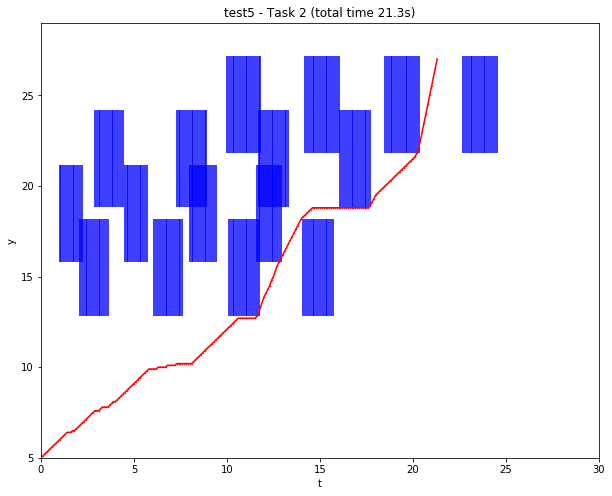

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000
current iteration: 40000
current iteration: 45000
current iteration: 50000
current iteration: 55000
current iteration: 60000
current iteration: 65000
current iteration: 70000
current iteration: 75000
current iteration: 80000
current iteration: 85000
current iteration: 90000
current iteration: 95000
current iteration: 100000
current iteration: 105000
current iteration: 110000
current iteration: 115000
current iteration: 120000


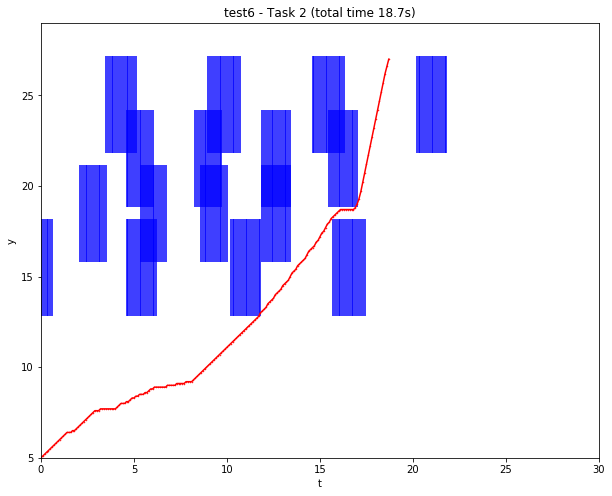

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000
current iteration: 40000
current iteration: 45000
current iteration: 50000
current iteration: 55000
current iteration: 60000
current iteration: 65000
current iteration: 70000
current iteration: 75000
current iteration: 80000
current iteration: 85000
current iteration: 90000
current iteration: 95000
current iteration: 100000
current iteration: 105000
current iteration: 110000
current iteration: 115000
current iteration: 120000
current iteration: 125000
current iteration: 130000
current iteration: 135000
current iteration: 140000
current iteration: 145000


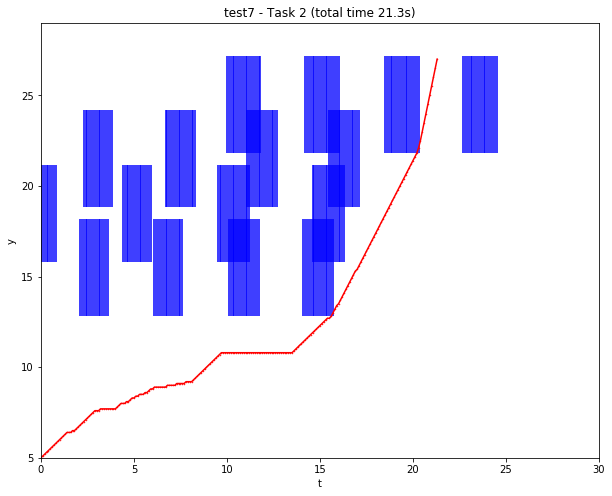

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000
current iteration: 40000
current iteration: 45000
current iteration: 50000
current iteration: 55000
current iteration: 60000
current iteration: 65000
current iteration: 70000
current iteration: 75000
current iteration: 80000
current iteration: 85000
current iteration: 90000
current iteration: 95000
current iteration: 100000
current iteration: 105000
current iteration: 110000
current iteration: 115000
current iteration: 120000
current iteration: 125000


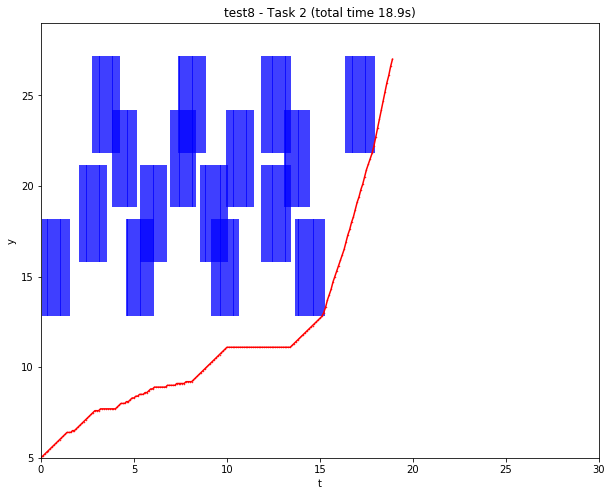

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000
current iteration: 40000
current iteration: 45000
current iteration: 50000
current iteration: 55000
current iteration: 60000
current iteration: 65000
current iteration: 70000
current iteration: 75000
current iteration: 80000
current iteration: 85000
current iteration: 90000
current iteration: 95000
current iteration: 100000
current iteration: 105000
current iteration: 110000
current iteration: 115000
current iteration: 120000
current iteration: 125000
current iteration: 130000


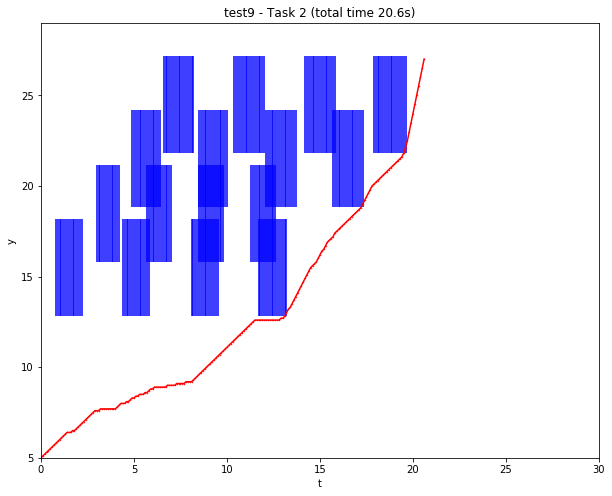

planning (t,y,v) = (0.1, 5, 0))...
current iteration: 5000
current iteration: 10000
current iteration: 15000
current iteration: 20000
current iteration: 25000
current iteration: 30000
current iteration: 35000
current iteration: 40000
current iteration: 45000
current iteration: 50000
current iteration: 55000
current iteration: 60000
current iteration: 65000
current iteration: 70000
current iteration: 75000
current iteration: 80000
current iteration: 85000


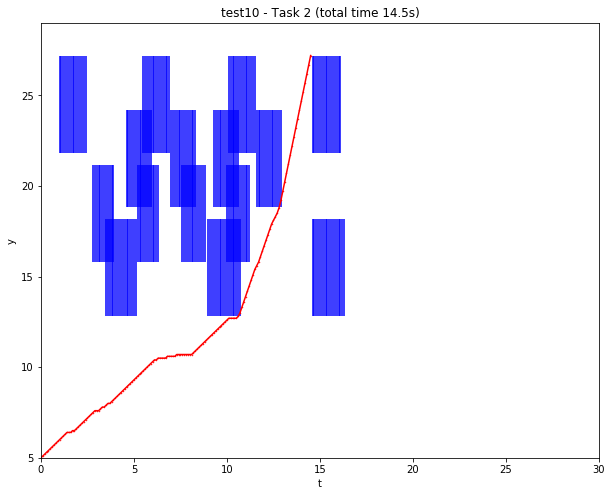

In [207]:
## TASK2

tBuff, yBuff = 0.3, 0.3

task = TASK2
FILES = ["test{}".format(i) for i in range(1,10+1)]
# FILES = ["test{}".format(i) for i in [7]]
# file = 'data3'

for file in FILES:
    PLAN_INTERVAL = 0.3

    curr = (dt, Y_ST, 0)
    actionsExec = [] # [[a,t]]
    pathExec = [[0,Y_ST]]    #[[t,y]]
    prevV = np.empty((1,1))
    data = getData(file, IS_POSE)
    obsTruth = np.array(list(data.values()))
    lastPlanned = dt

    while( curr[iY] < yGoal ):

        # Reality
        t = curr[iT]

        obstacles, v = estimObstacles(obsTruth[:,:tToi(t)+1,:])
        # Plan ahead
        if not np.array_equal(np.round(v,8),np.round(prevV,8)):
            if t-lastPlanned> PLAN_INTERVAL or round(t % PLAN_INTERVAL, 8) == dt:
                print("planning (t,y,v) = {})...".format(curr))
                out = aStar(curr,yGoal)
        #         ctrls = out[1][::-1][:tToi(PLAN_INTERVAL)]
                ctrls = out[1][::-1]
                lastPlanned = t

        # Execute plan
        if len(ctrls)!=0:
            ctrl = ctrls.pop(0)        
            curr = move(ctrl,curr)
            actionsExec.append([ctrl,t])
            pathExec.append([t,curr[iY]])
            # print("(t,a)={:.1f},{:.1f}".format(t,ctrl))

        prevV = v

    pathExec = np.array(pathExec)
    plotSpaceT(pathExec,file,task,data)
    controls = {'robot_0': actionsExec}
    writeOut(file,task,controls)